<a href="https://colab.research.google.com/github/SakibMostafa/CoLAB_Codes/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

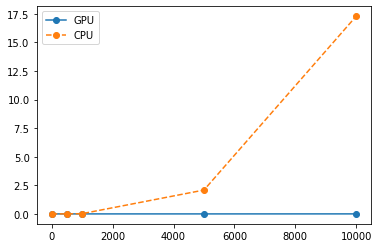

n	CPU			GPU
500	0.004695415496826172	0.0011479854583740234
1000	0.022831201553344727	0.0017175674438476562
5000	2.087688684463501	0.0008704662322998047
10000	17.29174566268921	0.0032830238342285156


In [18]:
import tensorflow as tf
import time
import matplotlib.pyplot as plt

tf.debugging.set_log_device_placement(True)

sizes = [2, 500, 1000, 5000, 10000]

cpu_Time = []
gpu_Time = []
for shapes in sizes:
  mat1 = tf.random.uniform(shape = [shapes, shapes], seed = 10, name="mat1")
  mat2 = tf.random.uniform(shape = [shapes, shapes], seed = 11, name="mat2")
  with tf.device('/CPU:0'):
    start_time = time.time()
    out_a = tf.matmul(mat1, mat2)
    end_time = time.time()
    cpu_Time.append((end_time - start_time))

  with tf.device('/GPU:0'):
    start_time = time.time()
    out_a = tf.matmul(mat1, mat2)
    end_time = time.time()
    gpu_Time.append((end_time - start_time))

fig, ax = plt.subplots()
ax.plot(sizes, gpu_Time, 'o-', label='GPU')
ax.plot(sizes, cpu_Time, 'o--', label='CPU')
leg = ax.legend()
plt.show()

print('n\tCPU\t\t\tGPU')
for i in range(1, len(cpu_Time)):
  print(str(sizes[i]) + '\t' + str(cpu_Time[i]) + '\t' + str(gpu_Time[i]))